In [1]:
#импортируем библиотеки
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import AUC,Recall, Precision

2.15.0


In [2]:
category = [3,6] #номера категорий кошки и лягушки

#загружаем данные
(train_images, train_labels), (test_images, test_labels)  = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 24s 0us/step


In [3]:
train_images.shape # число обучающих изображений

(50000, 32, 32, 3)

In [4]:
test_images.shape # число тестовых изображений

(10000, 32, 32, 3)

In [5]:
train_filter = ((train_labels == 3) | (train_labels == 6)).flatten()
test_filter = ((test_labels == 3) | (test_labels == 6)).flatten()

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

In [6]:
train_images.shape # число обучающих изображений

(10000, 32, 32, 3)

In [7]:
test_images.shape # число тестовых изображений

(2000, 32, 32, 3)

In [8]:
# преобразуем: 'cat' (класс 3) в 0 и 'frog' (класс 6) в 1
train_labels = np.where(train_labels == 3, 0, 1)
test_labels = np.where(test_labels == 3, 0, 1)

In [9]:
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

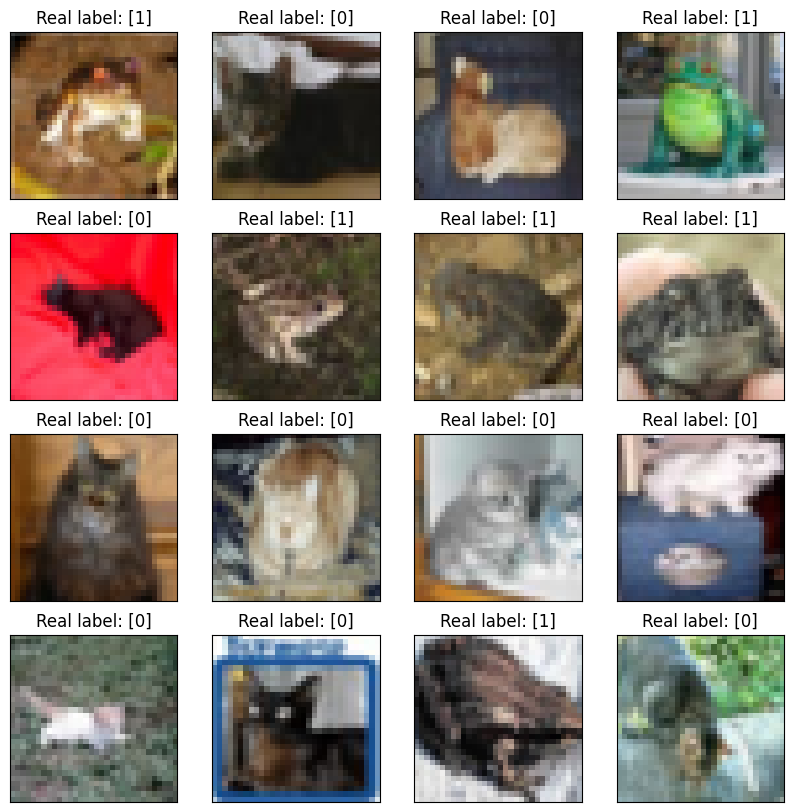

In [10]:
show_mnist(train_images, train_labels)
x_train = train_images.reshape((-1, 32*32)) # вытянули каждую картинку в вектор
x_test = test_images.reshape((-1, 32*32))

In [11]:
x_train, x_test2, y_train, y_test2 = train_test_split(train_images, train_labels, test_size = 0.20, stratify = train_labels)

**модель №1**

In [12]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32,3)),
  tf.keras.layers.MaxPooling2D(pool_size = 2),
  tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'), # функция активации выпрямленного линейного блока
  tf.keras.layers.MaxPooling2D(pool_size = 2),
  tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu'),
  tf.keras.layers.MaxPooling2D(pool_size = 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 64, activation = 'tanh',kernel_initializer = 'glorot_uniform'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])                                                           # Создаём архитектуру модели.

model1.compile(optimizer = 'adam', # Оптимизатор, реализующий алгоритм Адама.
              loss = 'binary_crossentropy',
              metrics = ['acc', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 8)           0

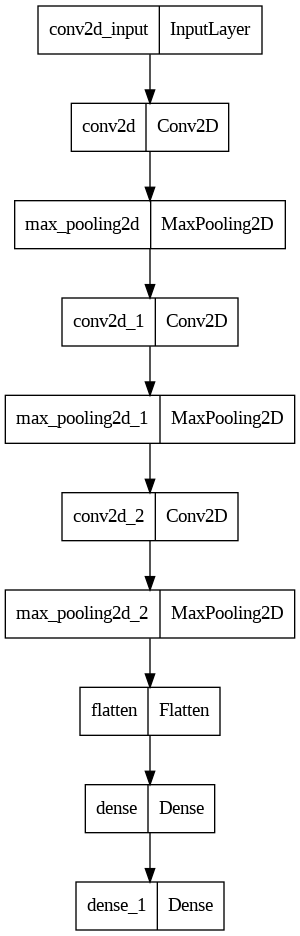

In [13]:
plot_model(model1)

In [14]:
history1 = model1.fit(train_images, train_labels, epochs = 10, validation_split = 0.2, batch_size = 64)    # Обучаем модель

Epoch 1/10
125/125 [==============================] - 12s 80ms/step - loss: 0.5810 - acc: 0.6867 - auc: 0.7625 - precision: 0.6670 - recall: 0.7511 - val_loss: 0.5299 - val_acc: 0.7385 - val_auc: 0.8437 - val_precision: 0.8639 - val_recall: 0.5554
Epoch 2/10
125/125 [==============================] - 10s 77ms/step - loss: 0.4584 - acc: 0.7875 - auc: 0.8682 - precision: 0.7877 - recall: 0.7896 - val_loss: 0.4356 - val_acc: 0.7925 - val_auc: 0.8808 - val_precision: 0.8205 - val_recall: 0.7396
Epoch 3/10
125/125 [==============================] - 9s 72ms/step - loss: 0.4239 - acc: 0.8067 - auc: 0.8869 - precision: 0.8065 - recall: 0.8093 - val_loss: 0.4145 - val_acc: 0.8130 - val_auc: 0.8956 - val_precision: 0.8402 - val_recall: 0.7650
Epoch 4/10
125/125 [==============================] - 8s 67ms/step - loss: 0.3943 - acc: 0.8244 - auc: 0.9035 - precision: 0.8237 - recall: 0.8272 - val_loss: 0.3846 - val_acc: 0.8230 - val_auc: 0.9080 - val_precision: 0.8148 - val_recall: 0.8281
Epoch 5/10

In [15]:
def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["acc"],label='train accuracy')
    plt.plot(history["val_acc"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

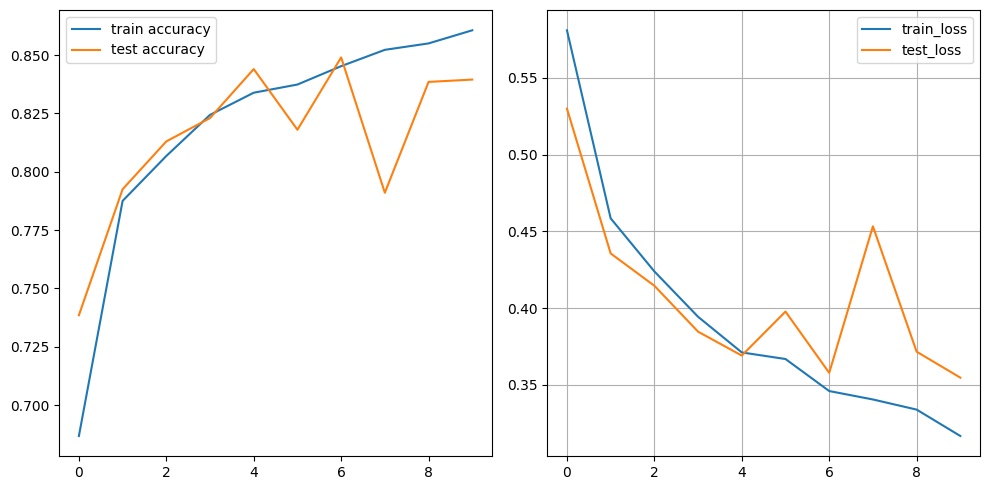

In [16]:
show_progress(history1.history)

In [18]:
loss, acc, auc, precision, recall= model1.evaluate(test_images, test_labels)

63/63 [==============================] - 1s 10ms/step - loss: 0.3245 - acc: 0.8615 - auc: 0.9380 - precision: 0.8858 - recall: 0.8300


Видна переобучаемость: по графикам можно отследить увеличение точности и уменьшение промахов. Accuracy of restored model = 86,15%. Модель умеет различать классы (auc = 0.94)

**модель №2**

In [19]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['acc', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])

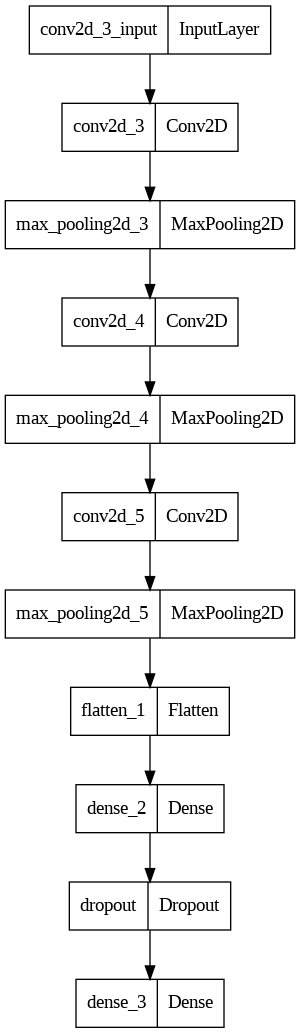

In [21]:
plot_model(model2)

In [20]:
history2 = model2.fit(train_images, train_labels, epochs = 15, validation_split = 0.2, batch_size = 64)

Epoch 1/15
125/125 [==============================] - 33s 239ms/step - loss: 0.6326 - acc: 0.6388 - auc: 0.6958 - precision: 0.6590 - recall: 0.5813 - val_loss: 0.5606 - val_acc: 0.7050 - val_auc: 0.8097 - val_precision: 0.8037 - val_recall: 0.5290
Epoch 2/15
125/125 [==============================] - 24s 188ms/step - loss: 0.4894 - acc: 0.7729 - auc: 0.8463 - precision: 0.7728 - recall: 0.7757 - val_loss: 0.4772 - val_acc: 0.7700 - val_auc: 0.8789 - val_precision: 0.7087 - val_recall: 0.9034
Epoch 3/15
125/125 [==============================] - 18s 144ms/step - loss: 0.4266 - acc: 0.8048 - auc: 0.8864 - precision: 0.8041 - recall: 0.8081 - val_loss: 0.4156 - val_acc: 0.8305 - val_auc: 0.9055 - val_precision: 0.8333 - val_recall: 0.8189
Epoch 4/15
125/125 [==============================] - 17s 139ms/step - loss: 0.3755 - acc: 0.8365 - auc: 0.9133 - precision: 0.8352 - recall: 0.8402 - val_loss: 0.3657 - val_acc: 0.8460 - val_auc: 0.9215 - val_precision: 0.8814 - val_recall: 0.7935
Epoc

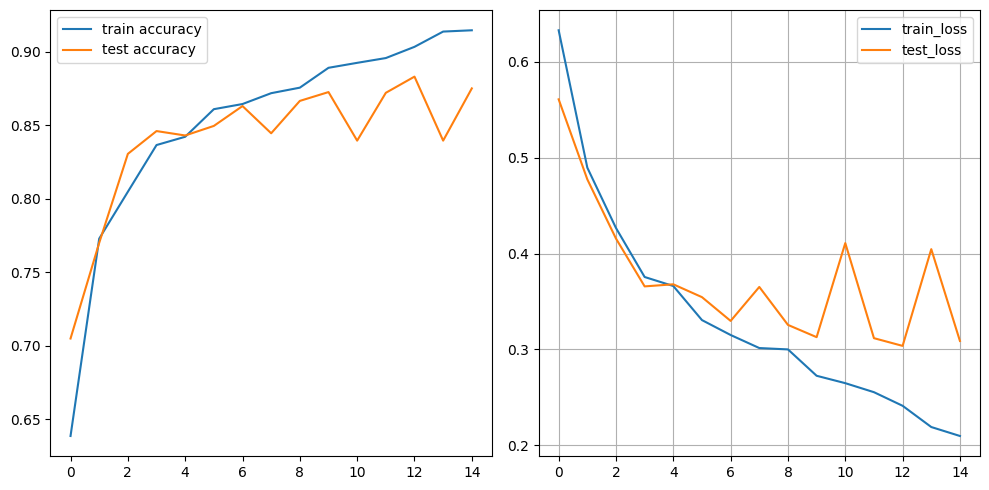

In [23]:
show_progress(history2.history)

In [24]:
loss, acc, auc, precision, recall= model2.evaluate(test_images, test_labels)

63/63 [==============================] - 1s 16ms/step - loss: 0.2819 - acc: 0.8845 - auc: 0.9559 - precision: 0.9258 - recall: 0.8360


по сравнению с первой моделью:
увеличено количество эпох и фильтров.

все показатели (кроме loss) немного выросли:

loss = 0.28 => модель имеет достаточно низкую потерю,

acc = ~88% - точность предсказывания правильных результатов,

auc близок к 1 => модель различает классы

**модель №3**

In [31]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='tanh', kernel_initializer='he_uniform'),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='SGD',
               loss='binary_crossentropy',
               metrics=['acc', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])

In [32]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 16)          4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 16)         

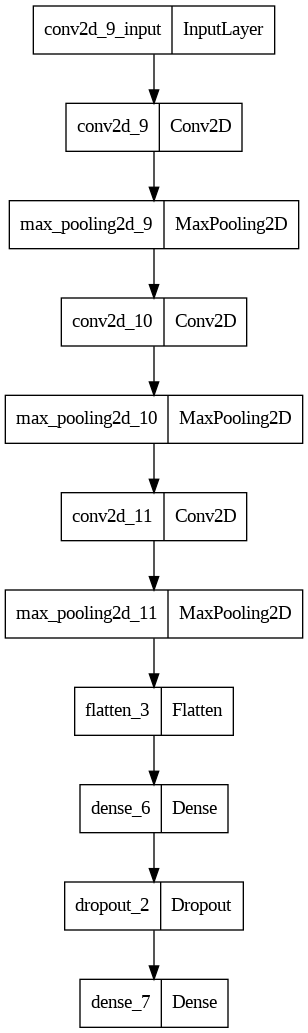

In [33]:
plot_model(model3)

In [34]:
history3 = model3.fit(train_images, train_labels, epochs = 15, validation_split = 0.2, batch_size = 64)

Epoch 1/15
125/125 [==============================] - 20s 152ms/step - loss: 0.6958 - acc: 0.5110 - auc: 0.5106 - precision: 0.5119 - recall: 0.5604 - val_loss: 0.6868 - val_acc: 0.6405 - val_auc: 0.6797 - val_precision: 0.6435 - val_recall: 0.6022
Epoch 2/15
125/125 [==============================] - 20s 161ms/step - loss: 0.6801 - acc: 0.5930 - auc: 0.6311 - precision: 0.6009 - recall: 0.5641 - val_loss: 0.6692 - val_acc: 0.6740 - val_auc: 0.7248 - val_precision: 0.7334 - val_recall: 0.5290
Epoch 3/15
125/125 [==============================] - 21s 166ms/step - loss: 0.6573 - acc: 0.6428 - auc: 0.6893 - precision: 0.6486 - recall: 0.6298 - val_loss: 0.6375 - val_acc: 0.6710 - val_auc: 0.7469 - val_precision: 0.6337 - val_recall: 0.7833
Epoch 4/15
125/125 [==============================] - 20s 162ms/step - loss: 0.6267 - acc: 0.6656 - auc: 0.7201 - precision: 0.6654 - recall: 0.6719 - val_loss: 0.6011 - val_acc: 0.6905 - val_auc: 0.7542 - val_precision: 0.7230 - val_recall: 0.6002
Epoc

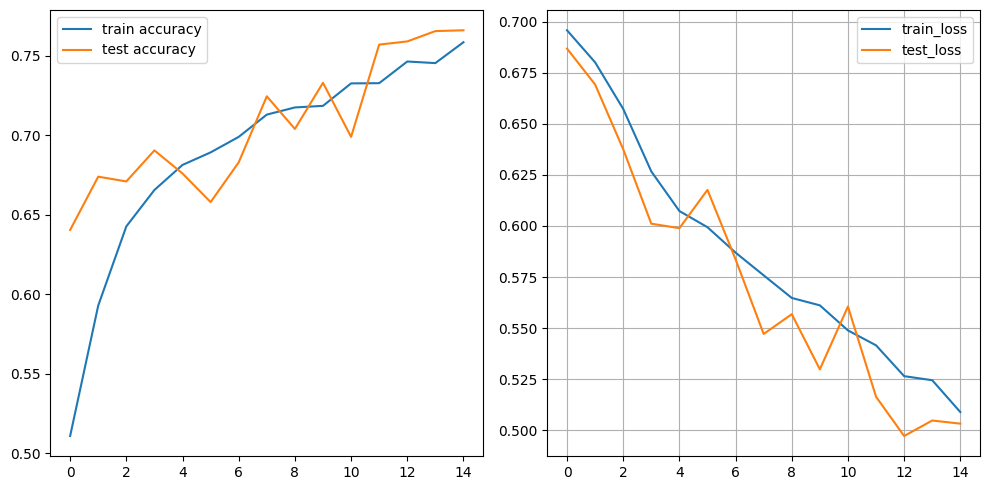

In [38]:
show_progress(history3.history)

In [39]:
loss, acc, auc, precision, recall= model3.evaluate(test_images, test_labels)

63/63 [==============================] - 1s 16ms/step - loss: 0.4877 - acc: 0.7770 - auc: 0.8750 - precision: 0.7245 - recall: 0.8940


по сравнению со 2 моделью был изменен оптимизатор (на SGD) и активационная функция последнего слоя: 'sigmoid', внутренние 'tanh'

все показатели стали меньше (кроме loss) :

loss = 0.49 => что больше, чем во 2 модели

acc = ~78% - точность снизилась,

auc близок к 1 => модель различает классы

**метрики**

модель 1

63/63 [==============================] - 1s 18ms/step
Accuracy: 0.8615


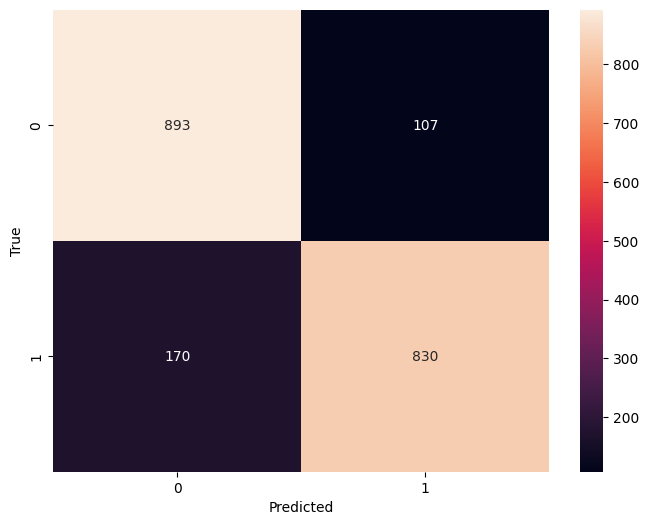

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Получение предсказаний
y_pred = model1.predict(test_images)

# Округление предсказаний до ближайшего целого числа
y_pred_rounded = np.round(y_pred).astype(int)

# Вычисление точности
accuracy = accuracy_score(test_labels, y_pred_rounded)
print("Accuracy:", accuracy)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(test_labels, y_pred_rounded)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [37]:
# Вычисление отчета о классификации
class_report = classification_report(test_labels, y_pred_rounded)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1000
           1       0.89      0.83      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



модель 2

63/63 [==============================] - 1s 15ms/step
Accuracy: 0.8845


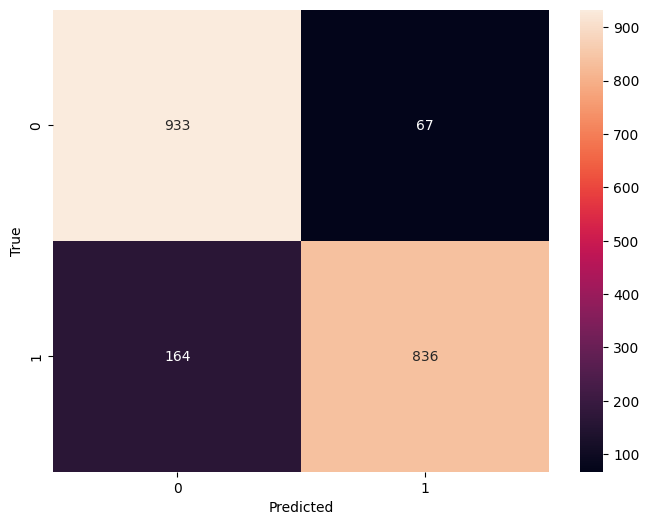

In [40]:
# Получение предсказаний
y_pred = model2.predict(test_images)

# Округление предсказаний до ближайшего целого числа
y_pred_rounded = np.round(y_pred).astype(int)

# Вычисление точности
accuracy = accuracy_score(test_labels, y_pred_rounded)
print("Accuracy:", accuracy)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(test_labels, y_pred_rounded)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [41]:
# Вычисление отчета о классификации
class_report = classification_report(test_labels, y_pred_rounded)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1000
           1       0.93      0.84      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.88      0.88      2000



модель 3

63/63 [==============================] - 2s 24ms/step
Accuracy: 0.777


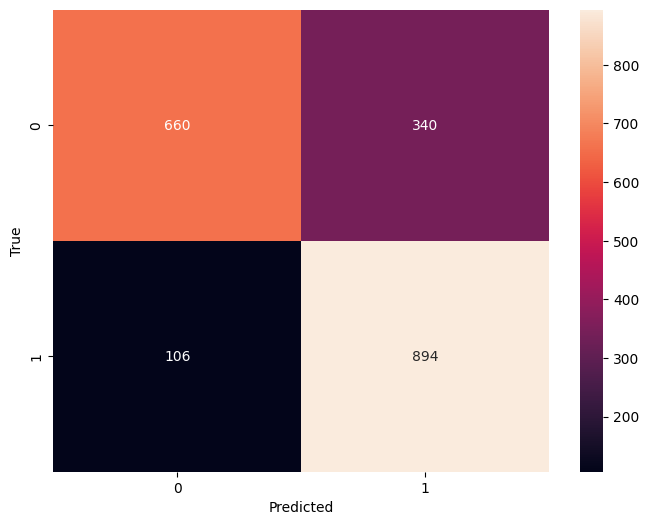

In [43]:
# Получение предсказаний
y_pred = model3.predict(test_images)

# Округление предсказаний до ближайшего целого числа
y_pred_rounded = np.round(y_pred).astype(int)

# Вычисление точности
accuracy = accuracy_score(test_labels, y_pred_rounded)
print("Accuracy:", accuracy)

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(test_labels, y_pred_rounded)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [44]:
# Вычисление отчета о классификации
class_report = classification_report(test_labels, y_pred_rounded)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.66      0.75      1000
           1       0.72      0.89      0.80      1000

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.77      2000
weighted avg       0.79      0.78      0.77      2000



**вывод:**

модель 1 имеет общую точность ~86%, среди всех моделей средне различает и котов и лягушек.

модель 2 имеет общую точность ~88%, что является наибольшим показателем из всех 3 моделей. она хорошо определяет котов, а лягушек чуть хуже

модель 3 имеет общую точность ~78%, что является хучшим результатом. однако, она имеет высокую полноту для класса 1 (лягушки)


лучше всех получилась 2 модель, но если важна правильная классификация именно лягушек, то есть смысл пользоваться 3.